# INTELIGENCIA ARTIFICIAL - UNIVERSIDAD DEL NORTE
PROGRAMA DE INGENIERÍA DE SISTEMAS <br>
PROFESOR: EDUARDO ZUREK, PH.D.<br>
<b>INTEGRANTES</b>:
<br>
<ul>
<li>Johan Sebastian Burgos Guerrero</li>
<li>Sebastian David Ariza Coll</li>
<li>Daniel Valencia Cordero</li>
</ul>

# Tema: Poda Alfa-Beta


# Heuristica Utilizada
Para el desarrollo de la heuristica se tuvieron en consideración los siguientes aspectos [[1]](https://github.com/kevingregor/Checkers) dependiendo del jugador en turno:

1.   Cantidad de peones

2.   Cantidad de reinas

3.   Cantidad de fichas en la primera y última fila del tablero

4.   Cantidad de fichas en en la mitad del tablero, es decir, sea f el número de la fila y c el número de la columna. se consideran solo los valores para: (3<=f<=4 y 2<=c<=5) (verde)

5.   Cantidad de fichas en el el exterior del cuadro del centro (azul)

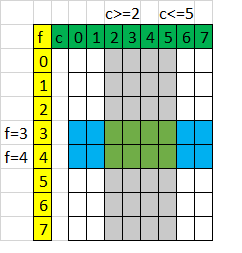

6.   Si una ficha puede ser eliminada, es decir si mi ficha es vulnerable

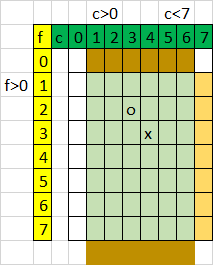 
7.   Fichas protegidas

<a href="https://imgbb.com/"><img src="https://i.ibb.co/WHW0Nhm/Sin-t-tulo.png" alt="Sin-t-tulo" border="0"></a>



In [1]:
def HeuristicaJuego(tablero, minmax):
  import numpy as np
  # Index 0: Number of pawns
  # Index 1: Number of kings
  # Index 2: Number in back row
  # Index 3: Number in middle box
  # Index 4: Number in middle 2 rows, not box
  # Index 5: Number that can be taken this turn
  # Index 6: Number that are protected
  P = 0
  peso = 0
  if (minmax == "min"):
    P = 1  
  else:
    P = 2
  jugador1 = [0,0,0,0,0,0,0]
  jugador2 = [0,0,0,0,0,0,0]
  nY = tablero.count("Y") #numero de Peones Max P1
  jugador1[0]=nY
  nX = tablero.count("X") #numero Damas Max P1
  jugador1[1]=nX
  nN = tablero.count("N") #Peones Min P2
  jugador2[0]=nN
  nO = tablero.count("O") #Damas Min P2
  jugador2[1]=nO
  if (nY == 0 and nX == 0):
    return -1000
  else:
    if (nN == 0 and nO == 0):
      return 1000
    else:
      if (nX == 1 and nO == 1):
        return 100
      else:
        for i in range(0,64):
          if (tablero[i] != "_"):#valido que haya una ficha
            if (P == 1): #valido si es jugador1
              f = i // 8 #fila
              c = i % 8 #columna
              if (f == 7):#ficha en la última fila
                jugador1[2] += 1
                jugador1[6] += 1
              else:
                  if (f == 3 or f == 4):#Fichas en la mitad
                    if (c >= 2 and c <= 5):#cuadro interno
                      jugador1[3] += 1;
                    else: #exterior del cuadro
                      jugador1[4] += 1
                  if (f > 0):#Vulnerable, me puede matar el jugador 2
                    if (c > 0 and c < 7):
                      if (tablero[8*(f-1)+(c-1)]!= "_" and (tablero[8*(f-1)+(c-1)]=="N" or tablero[8*(f-1)+(c-1)]== "O") and tablero[8*(f+1)+(c+1)]== "_"):#der
                        jugador1[5]+=1
                      if (tablero[(8*f-1)+(c+1)]!="_" and (tablero[8*(f-1)+(c+1)]== "N" or tablero[8*(f-1)+(c+1)]== "O" ) and tablero[8*(f+1)+(c-1)]== "_"):#izq
                        jugador1[5]+=1
                  if (f<7):#Valido que mi ficha esté protegida
                    if (c == 0 or c == 7):
                      jugador1[6]+=1
                    else:
                      if ((tablero[8*(f+1)+(c-1)] != "_" and ((tablero[8*(f+1)+(c-1)] == "Y" or tablero[8*(f+1)+(c-1)] == "X" ) or tablero[8*(f+1)+(c-1) != "X"])) and (tablero[8*(f + 1)+(c + 1)] != "_" and ((tablero[8*(f+1)+(c+1)] == "Y" or tablero[8*(f+1)+(c+1)] == "X") or tablero[8*(f+1)+(c+1)]!="X"))):
                        jugador1[6]+=1
            if (P == 2): #valido si es jugador2
              f=i//8 #fila
              c=i%8 #columna
              if (f == 0):#ficha en la última fila
                jugador2[2]+=1
                jugador2[6]+=1
              else:
                if (f == 3 or f == 4):#Fichas en la mitad
                  if (c>=2 and c<=5):#cuadro interno
                    jugador2[3]+=1;
                  else: #exterior del cuadro
                    jugador2[4]+=1
                if (f<7):#Vulnerable, me puede matar el jugador 1
                  if (c>0 and c<7):
                    if (tablero[8*(f+1)+(c-1)]!= "_" and (tablero[8*(f+1)+(c-1)]=="Y" or tablero[8*(f+1)+(c-1)]== "X") and tablero[8*(f-1)+(c+1)]== "_"):#der
                      jugador1[5]+=1
                    if (tablero[8*(f+1)+(c+1)]!="_" and (tablero[8*(f+1)+(c+1)]== "Y" or tablero[8*(f+1)+(c+1)]== "X" ) and tablero[8*(f-1)+(c-1)]== "_"):#izq
                      jugador1[5]+=1
                if (f>0):#Valido que mi ficha esté protegida
                  if (c == 0 or c == 7):
                    jugador1[6]+=1
                  else:
                    if ((tablero[8*(f-1)+(c-1)] != "_" and ((tablero[8*(f-1)+(c-1)] == "N" or tablero[8*(f-1)+(c-1)] == "O" ) or tablero[8*(f-1)+(c-1) != "O"])) and (tablero[8*(f - 1)+(c + 1)] != "_" and ((tablero[8*(f-1)+(c+1)] == "N" or tablero[8*(f-1)+(c+1)] == "O") or tablero[8*(f-1)+(c+1)]!="O"))):
                      jugador1[6]+=1
        # pesos: peon, reina, primera y última fila, cuadro del medio, exterior del cuadro interno, vulnerable, protegida
        player1Weights = [3, 3, 3, 3, 3, -3, 3]
        player2Weights = [4, 8, 1, 2, 1.5, -3, 3]

        jugador1 = np.array(jugador1)
        jugador1_multi = [a*b for a,b in zip(jugador1, player1Weights)]
        jugador2 = np.array(jugador2)
        jugador2_multi = [a*b for a,b in zip(jugador2, player2Weights)]
        diferencia = [e1 - e2 for e1, e2 in zip(jugador1_multi,jugador2_multi)]
        peso = sum(diferencia)
        if (minmax == "min"):
          return  peso 
        else:
          return  peso*(-1)

# Calculo de los bordes del tablero
Se calcula las posiciones de los bordes para tener en cuenta en los movimientos de las fichas.

In [2]:
def Border(a):
  vecborder = [0,8,16,24,32,40,48,56,7,15,23,31,39,47,55,63,1,2,3,4,5,6,57,58,59,60,61,62]
  if (vecborder.count(a) == 0):
    return -1
  else:
    return 0

#Movimiento de los peones

1. La a es la pos actual
2. La c es la dirreccion del movimiento, arriba o abajo, 1 o -1 respectivamente
3. La d es si me voy para la diagonal de la der o de la izq, 1 o -1 respectivamente









In [3]:
def MovPeon(tablero,a,c,d):
  pos = []
  nuvPos = a+(-1*c)*8+(-1*d)#esto es mover 1 cuadro en diagonal
  borIzq = [0,8,16,24,32,40,48,56]
  borDer = [7,15,23,31,39,47,55,63]  
  #print(a,c,d,nuvPos)
  if (nuvPos < len(tablero)):
    if (tablero[nuvPos] != "_"):#Valido que el nuvPos este vacio
      killpeonn = KillPeon(tablero,a,c,d)   
      #print("mata",a)     
      if (killpeonn[0] == "True"):
        pos.append("Kill")
        if (d== -1):
          pos.append("Izq")
        else:
          pos.append("Der")
        pos.append(killpeonn[1])       
      else:
        pos.append("Mov")
        pos.append("False")
    else:
      if ( (borDer.count(nuvPos) == 1 and d == 1) or (borIzq.count(nuvPos) == 1 and d == -1) ):#Valido que no me vaya pa' un borde
        pos.append("Mov")
        pos.append("False")  
      else:
        pos.append("Mov")
        pos.append(nuvPos)
  else:
    pos.append("Mov")
    pos.append("False") 
  return pos

In [4]:
def KillPeon(tablero,a,c,d):
  pos = []
  borIzq = [0,8,16,24,32,40,48,56]
  borDer = [7,15,23,31,39,47,55,63] 
  nuvPos = a+(-1*c)*8+(-1*d)
  movkill = a+(-1*c)*2*8+2*(-1*d)
  if (movkill < len(tablero)):
    if (tablero[a] == tablero[nuvPos]):#Valido que la ficha de la nuvPos no sea del mismo grupo
      pos.append("False")
      pos.append(0)    
    else:
      if ( (borDer.count(movkill) == 1 and d == 1) or (borIzq.count(movkill) == 1 and d == -1) ):#Valido que no me vaya pa' un borde
        pos.append("False")
        pos.append(0) 
      else:
        if (tablero[movkill] == "_"):#Valido que el movkill este vacio
            pos.append("True")
            pos.append(movkill)
        else:
          pos.append("False")
          pos.append(0)
  else:
    pos.append("False")
    pos.append(0)
  return pos


# Heuristica Damas
Se creo una heuristica la cual obtiene todas las fichas que existen diagonalmente en un movimiento posible de la dama, se realiza una ponderacion de estas fichas tal que numY+2*numX - (numN+2*numO) y luego se retorna este valor para decidir el mejor movimiento de la dama.

In [5]:
def HeuristicaDamas(tablero, jugada, minmax):
  der1, der2, izq1, izq2 = diagonal(jugada)
  numY = 0
  numX = 0
  numN = 0
  numO = 0
  for i in (der1):
    if (tablero[i] == "Y"):
      numY = numY +1
    if (tablero[i] == "N"):
      numN = numN + 1
    if (tablero[i] == "X"): 
      numX = numX + 1
    if (tablero[i] == "O"): 
      numO = numO + 1
  for i in (der2):
    if (tablero[i] == "Y"):
      numY = numY +1
    if (tablero[i] == "N"):
      numN = numN + 1
    if (tablero[i] == "X"): 
      numX = numX + 1
    if (tablero[i] == "O"): 
      numO = numO + 1
  for i in (izq1):
    if (tablero[i] == "Y"):
      numY = numY +1
    if (tablero[i] == "N"):
      numN = numN + 1
    if (tablero[i] == "X"): 
      numX = numX + 1
    if (tablero[i] == "O"): 
      numO = numO + 1
  for i in (izq2):
    if (tablero[i] == "Y"):
      numY = numY +1
    if (tablero[i] == "N"):
      numN = numN + 1
    if (tablero[i] == "X"): 
      numX = numX + 1
    if (tablero[i] == "O"): 
      numO = numO + 1

  pos = numY+2*numX - (numN+2*numO)
  return pos

# Diagonales
Se obtienes todas las posibles diagonales de una dama para revisar las fichas que existen a su lado

In [6]:
  def diagonal(pos):
    lista=[0 ,1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10 ,11 ,12 ,13 ,14 ,15 ,16 ,17 ,18 ,19 ,20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30 ,31 ,32 ,33 ,34 ,35 ,36 ,37 ,38 ,39 ,40 ,41 ,42 ,43 ,44 ,45 ,46 ,47 ,48 ,49 ,50 ,51 ,52 ,53 ,54 ,55 ,56 ,57 ,58 ,59 ,60 ,61 ,62 ,63]
    t=[]
    a=pos
    vecbor = [0,8,16,24,32,40,48,56,7,15,23,31,39,47,55,63,1,2,3,4,5,6,57,58,59,60,61,62]
    borIzq = [0,8,16,24,32,40,48,56]
    borDer = [7,15,23,31,39,47,55,63]
    bordSup = [0,1,2,3,4,5,6,7]
    bordInf = [56,57,58,59,60,61,62,63]
    limite=-1
    t = list(lista[a::9])
    d =[]
    for index, i in enumerate(t):
      if (index!=0):
        if (i in vecbor):
            limite=index
            break

    if (len(t) > 1):
      if ( t[0] in vecbor and t[1] in vecbor):
        if ( t[1] in borDer or t[1] in bordInf ):
          if ( t[1] not in borDer and t[1] not in borDer ):
            if ( t[1] not in bordInf and t[1] not in bordInf ):
              d = list(t[0:limite+1])
        else:
          d = list(t[0:limite])
      else:
       d = list(t[0:limite+1])
    t1 = list(lista[a::-9])
    d1 = []
    for index, i in enumerate(t1):
      if (index!=0):
        if (i in vecbor):
            limite=index
            break

    if (len(t1) > 1):
      if ( t1[0] in vecbor and t1[1] in vecbor):
        if ( t1[1] in borIzq or t1[1] in bordSup ):
          if ( t1[1] not in borIzq and t1[1] not in borIzq ):
            if ( t1[1] not in bordSup and t1[1] not in bordSup ):
              d1 = list(t1[0:limite+1])
        else:
          d1 = list(t1[0:limite])
      else:
        d1 = list(t1[0:limite+1])

    t2 = list(lista[a::7])
    d2 = []
    for index, i in enumerate(t2):
      if (index!=0):
        if (i in vecbor):
            limite=index
            break

    if (len(t2) > 1):
      if ( t2[0] in vecbor and t2[1] in vecbor):
        if ( t2[1] in borIzq or t2[1] in bordInf ):
          if ( t2[1] not in bordInf and t2[1] not in bordInf ):
            if ( t2[1] not in borIzq and t2[1] not in borIzq ):
              d2 = list(t2[0:limite+1])
        else:
          d2 = list(t2[0:limite])
      else:
        d2 = list(t2[0:limite+1])
    t3 = list(lista[a::-7])
    d3 = []
    for index, i in enumerate(t3):
      if (index!=0):
        if (i in vecbor):
            limite=index
            break

    if (len(t3) > 1):
      if ( t3[0] in vecbor and t3[1] in vecbor):
        if ( t3[1] in borDer or t3[1] in bordSup ):
          if ( t3[1] not in borDer and t3[1] not in borDer ):
            if ( t3[1] not in bordSup and t3[1] not in bordSup ):
              d3 = list(t3[0:limite+1])
        else:
          d3 = list(t3[0:limite])
      else:
       d3 = list(t3[0:limite+1])
    return d,d1,d2,d3

#Movimiento de las damas

1. La a es la pos actual
2. La c es la dirreccion del movimiento, arriba o abajo, 1 o -1 respectivamente
3. La d es si me voy para la diagonal de la izq o de la dercha, -1 o 1 respectivamente
4. Se maneja de la misma manera de los peones solo que se analiza toda la diagonal y la heuristica decide cual es la mejor jugada para ambos jugadores.


In [7]:
def MovDama(tablero,minmax,a,c,d):
  pos = []
  heuMax = -10000
  vecbor = [0,8,16,24,32,40,48,56,7,15,23,31,39,47,55,63,1,2,3,4,5,6,57,58,59,60,61,62]
  nuvPos = a+(-1*c)*8+(-1*d)#esto es mover 1 cuadro en diagonal
  actuDama = []
  if (len(tablero) > nuvPos and nuvPos > 0):
    killDamaa, actuDama = killDama(tablero, minmax, a, c, d)
    #print(killDamaa, actuDama)
    if (actuDama[0] == "True"):
      pos.clear()
      pos.append("Kill")
      pos.append(killDamaa)
      pos.append(actuDama[1])
    else:
      while (tablero[nuvPos] == "_"):      
        if (len(tablero) > nuvPos and nuvPos > 0):
          if (vecbor.count(nuvPos) == 0):
            tem = HeuristicaDamas(tablero, nuvPos, minmax)
            if (tem > heuMax ):
              pos.clear()
              pos.append("True")
              pos.append(nuvPos)
              heuMax = tem 
          else:
            pos.append("False")
            pos.append(0)
            break 
        else:
          pos.append("False")
          pos.append(0)
          break
        nuvPos = nuvPos +(-1*c)*8+(-1*d)#esto es mover 1 cuadro en diagonal
      pos.append("False")
      pos.append(0)      
  else:
      pos.append("False")
      pos.append(0)  
  return pos

In [8]:
def killDama(tablero, minmax, a, c, d):
  pos = []
  nuvPos = a+(-1*c)*8+(-1*d)
  vecbor = [0,8,16,24,32,40,48,56,7,15,23,31,39,47,55,63,1,2,3,4,5,6,57,58,59,60,61,62]
  heuMax = -10000
  tem = 0
  killPos = 0
  if (len(tablero) > nuvPos and nuvPos > 0):
    while (tablero[nuvPos] == "_"):
      nuvPos = nuvPos +(-1*c)*8+(-1*d)#esto es mover 1 cuadro en diagonal
      if (len(tablero) <= nuvPos or nuvPos <= 0):
        break
  #print(nuvPos)
  if (len(tablero) > nuvPos and nuvPos > 0):
    if (vecbor.count(nuvPos) == 0):
      #print("aa",a)
      if (minmax == "min"):
        if (tablero[nuvPos] == "X" or tablero[nuvPos] == "Y"):
            killPos = nuvPos
            nuvPos = nuvPos +(-1*c)*8+(-1*d)
            while (tablero[nuvPos] == "_"):      
              if (len(tablero) > nuvPos and nuvPos > 0):
                if (vecbor.count(nuvPos) == 0):
                  tem = HeuristicaDamas(tablero, nuvPos, minmax)
                  if (tem > heuMax ):
                    pos.clear()
                    pos.append("True")
                    pos.append(nuvPos)
                    heuMax = tem 
                else:
                  #print("1")
                  pos.append("False")
                  pos.append(0)
                  break 
              else:
              #3print("2")
                pos.append("False")
                pos.append(0)
                break
              nuvPos = nuvPos +(-1*c)*8+(-1*d)#esto es mover 1 cuadro en diagonal
            #print("3")
            pos.append("False")
            pos.append(0)
        else:
          #print("4")
          pos.append("False")
          pos.append(0)
      else: 
        if (tablero[nuvPos] == "O" or tablero[nuvPos] == "N"):
            killPos = nuvPos
            nuvPos = nuvPos +(-1*c)*8+(-1*d)
            while (tablero[nuvPos] == "_"):      
              if (len(tablero) > nuvPos and nuvPos > 0):
                if (vecbor.count(nuvPos) == 0):
                  tem = HeuristicaDamas(tablero, nuvPos, minmax)
                  if (tem > heuMax ):
                    pos.clear()
                    pos.append("True")
                    pos.append(nuvPos)
                    heuMax = tem 
                else:
                  #print("5")
                  pos.append("False")
                  pos.append(0)
                  break 
              else:
                pos.append("False")
                pos.append(0)
                #print("6")
                break
              nuvPos = nuvPos +(-1*c)*8+(-1*d)#esto es mover 1 cuadro en diagonal
            #print("7")
            pos.append("False")
            pos.append(0)
        else:
          #print("8")
          pos.append("False")
          pos.append(0)
    else:
      #print("9")
      pos.append("False")
      pos.append(0)      
  else:
      #print("10")
      pos.append("False")
      pos.append(0)
  return killPos, pos

# Generar Hijos MinMax
Describir:...

1. La a es la pos actual
2. La c es la dirreccion del movimiento, arriba o abajo, 1 o -1 respectivamente
3. La d es si me voy para la diagonal de la der o de la izq, 1 o -1 respectivamente
4. Se tiene en cuenta las funciones de movpeon y movdama para analizar los posibles movimientos tanto a la derecha como a a la izquierda y con el vector decision que retorna cada uno de estas funciones se realiza el movimiento correspondiente.


In [9]:
def generar_hijos(tablero,minmax):
  #Modificar para las damas.
    j = 0
    t =[]
    hijos = []
    bordSup = [0,1,2,3,4,5,6,7]
    bordInf = [56,57,58,59,60,61,62,63]
    for index, i in enumerate(tablero):
      t.clear()
      #print(index)
      if (minmax == "min"):#Inicio del tablero  
        if (i == "N"):
          der = MovPeon(tablero, index, 1, 1) #pa'arriba y a la derecha      
          #print(der)
          izq = MovPeon(tablero, index, 1, -1) #pa'arriba y a la izquierda
          #print(izq)
          for j in range(0,len(der)-1):
            if (der[j] == "Kill"):
              if (der[j+1] == "Der"):
                t.clear()
                t = list(tablero)
                if (bordSup.count(der[j+2]) == 1 ):
                  t[der[j+2]] = "O"#Muevo la ficha
                else:
                  t[der[j+2]] = "N"#Muevo la ficha
                t[der[j+2]+8+1] = "_"#Aqui elimino la ficha que salte, que estaria abajo y a la izq
                t[index] = "_"#Coloco disponible el espacio donde estaba
                #print("1",index,der[j+2]+8+1,der[j+2])
              else:
                if (der[j+1] == "Izq"):
                  t.clear()
                  t = list(tablero)
                  if (bordSup.count(der[j+2]) == 1 ):
                    t[der[j+2]] = "O"#Muevo la ficha
                  else:
                    t[der[j+2]] = "N"#Muevo la ficha
                  t[der[j+2]+8-1] = "_"#Aqui elimino la ficha que salte, que estaria abajo y a la derecha
                  t[index] = "_"#Coloco disponible el espacio donde estaba
                  #print("2",index,der[j+2]+8-1,der[j+2])
                else:
                  t.clear()
                  t = list(tablero)
                  if (bordSup.count(der[j+1]) == 1 ):
                    t[der[j+1]] = "O"#Muevo la ficha
                  else:
                    t[der[j+1]] = "N"#Muevo la ficha
                  t[der[j+1]+8+1] = "_"#Aqui elimino la ficha que salte, que estaria abajo y a la izq
                  t[index] = "_"#Coloco disponible el espacio donde estaba    
                  #print("3",index,der[j+1]+8+1,der[j+1])
              hijo = ''.join(t)            
              t.clear()
              hijos.append(hijo)        
            else:
              if (der[j] == "Mov"):
                if (der[j+1] != "False"):
                  t.clear()
                  t = list(tablero)
                  #print("------------",der[j+1])
                  if der[j+1] in bordSup:
                    t[der[j+1]] = "O"#Muevo la ficha
                  else:
                    t[der[j+1]] = "N"
                  t[index] = "_"
                  #print("4",index,der[j+1])                                   
                  hijo = ''.join(t)            
                  t.clear()
                  hijos.append(hijo)

          for l in range(0,len(izq)-1):
            if (izq[l] == "Kill"):
              if (izq[l+1] == "Der"):
                t.clear()
                t = list(tablero)
                if (bordSup.count(izq[l+2]) == 1 ):
                  t[izq[l+2]] = "O"#Muevo la ficha
                else:
                  t[izq[l+2]] = "N"#Muevo la ficha
                t[izq[l+2]+8+1] = "_"#Aqui elimino la ficha que salte, que estaria abajo a la izq
                t[index] = "_"#Coloco disponible el espacio donde estaba
                #print("5",index,izq[l+2]+8+1,izq[l+2])
              else:
                if (izq[l+1] == "Izq"):
                  t.clear()
                  t = list(tablero)
                  if (bordSup.count(izq[l+2]) == 1 ):
                    t[izq[l+2]] = "O"#Muevo la ficha
                  else:
                    t[izq[l+2]] = "N"#Muevo la ficha
                  t[izq[l+2]+8-1] = "_"#Aqui elimino la ficha que salte, que estaria abajo a la der
                  t[index] = "_"#Coloco disponible el espacio donde estaba
                  #print("6",index,izq[l+2]+8-1,izq[l+2])
                else:
                  t.clear()
                  t = list(tablero)
                  if (bordSup.count(izq[l+1]) == 1 ):
                    t[izq[l+1]] = "O"#Muevo la ficha
                  else:
                    t[izq[l+1]] = "N"#Muevo la ficha
                  t[izq[l+1]+8-1] = "_"#Aqui elimino la ficha que salte, que estaria abajo a la der
                  t[index] = "_"#Coloco disponible el espacio donde estaba
                  #print("7",index,izq[l+1]+8-1,izq[l+1])          
              hijo = ''.join(t)              
              t.clear()
              hijos.append(hijo)
            else:
              if (izq[l] == "Mov"):
                if (izq[l+1] != "False"):
                  t.clear()
                  t = list(tablero)
                  #print("------------",izq[l+1])
                  if izq[l+1] in bordSup:
                    t[izq[l+1]] = "O"#Muevo la ficha
                  else:
                    t[izq[l+1]] = "N"
                  t[index] = "_"
                  #print("8",index,izq[l+1])               
                  hijo = ''.join(t)              
                  t.clear()
                  hijos.append(hijo)
        if (i == "O"):#Dama
          der1 = MovDama(tablero,minmax, index, 1, 1)
          if (der1[0] == "Kill"):
            t = list(tablero)
            t[der1[2]] = "O"#Muevo la ficha
            t[der1[1]] = "_"#Aqui elimino la ficha que salte, que estaria abajo a la izq
            t[index] = "_"#Coloco disponible el espacio donde estaba
            hijo = ''.join(t)
            t.clear()
            hijos.append(hijo)
          else:
            if (der1[0] != "False"):
              t = list(tablero)
              t[der1[1]] = "O"
              t[index] = "_"
              hijo = ''.join(t)
              t.clear()
              hijos.append(hijo)

          izq1 = MovDama(tablero,minmax, index, 1, -1)
          if (izq1[0] == "Kill"):
            t = list(tablero)
            t[izq1[2]] = "O"#Muevo la ficha
            t[izq1[1]] = "_"#Aqui elimino la ficha que salte, que estaria abajo a la izq
            t[index] = "_"#Coloco disponible el espacio donde estaba
            hijo = ''.join(t)
            t.clear()
            hijos.append(hijo)
          else:
            if (izq1[0] != "False"):
              t = list(tablero)
              t[izq1[1]] = "O"
              t[index] = "_"
              hijo = ''.join(t)
              t.clear()
              hijos.append(hijo)

          der2 = MovDama(tablero,minmax, index, -1, 1)
          if (der2[0] == "Kill"):
            t = list(tablero)
            t[der2[2]] = "O"#Muevo la ficha
            t[der2[1]] = "_"#Aqui elimino la ficha que salte, que estaria abajo a la izq
            t[index] = "_"#Coloco disponible el espacio donde estaba
            hijo = ''.join(t)
            t.clear()
            hijos.append(hijo)
          else:
            if (der2[0] != "False"):
              t = list(tablero)
              t[der2[1]] = "O"
              t[index] = "_"
              hijo = ''.join(t)
              t.clear()
              hijos.append(hijo)

          izq2 = MovDama(tablero,minmax, index, -1, -1)
          if (izq2[0] == "Kill"):
            t = list(tablero)
            t[izq2[2]] = "O"#Muevo la ficha
            t[izq2[1]] = "_"#Aqui elimino la ficha que salte, que estaria abajo a la izq
            t[index] = "_"#Coloco disponible el espacio donde estaba
            hijo = ''.join(t)
            t.clear()
            hijos.append(hijo)
          else:
            if (izq2[0] != "False"):
              t = list(tablero)
              t[izq2[1]] = "O"
              t[index] = "_"
              hijo = ''.join(t)
              t.clear()
              hijos.append(hijo)
      else:
        if (i == "Y"):
          der = MovPeon(tablero, index, -1, 1)#pa abajo a la derecha
          #print(der)
          izq = MovPeon(tablero, index, -1,-1)#pa abajo a la izquierda
          #print(izq)
          for j in range(0,len(der)-1):
            t.clear()
            if (der[j] == "Kill"):
              if (der[j+1] == "Der"):
                t = list(tablero)
                if (bordInf.count(der[j+2]) == 1 ):
                  t[der[j+2]] = "X"#Muevo la ficha
                else:
                  t[der[j+2]] = "Y"#Muevo la ficha
                t[der[j+2]-8+1] = "_"#Aqui elimino la ficha que salte
                t[index] = "_"#Coloco disponible el espacio donde estaba
                #print("9",index,der[j+2]-8+1,der[j+2])
              else:
                if (der[j+1] == "Izq"):
                  t = list(tablero)
                  if (bordInf.count(der[j+2]) == 1 ):
                    t[der[j+2]] = "X"#Muevo la ficha
                  else:
                    t[der[j+2]] = "Y"#Muevo la ficha
                  t[der[j+2]-8-1] = "_"#Aqui elimino la ficha que salte
                  t[index] = "_"#Coloco disponible el espacio donde estaba
                  #print("10",index,der[j+2]-8-1,der[j+2])
                else:
                  t = list(tablero)
                  if (bordInf.count(der[j+1]) == 1 ):
                    t[der[j+1]] = "X"#Muevo la ficha
                  else:                 
                    t[der[j+1]] = "Y"#Muevo la ficha
                  t[der[j+1]-8+1] = "_"#Aqui elimino la ficha que salte
                  t[index] = "_"#Coloco disponible el espacio donde estaba
                  #print("11",index,der[j+1]-8+1,der[j+1])
              hijo = ''.join(t)            
              t.clear()
              hijos.append(hijo)
            else:
              if (der[j] == "Mov"):
                if (der[j+1] != "False"):
                  t = list(tablero)
                  if (bordInf.count(der[j+1]) == 1 ):
                    t[der[j+1]] = "X"#Muevo la ficha
                  else:                  
                    t[der[j+1]] = "Y"
                  t[index] = "_"     
                  #print("12",index,der[j+1])                       
                  hijo = ''.join(t)            
                  t.clear()
                  hijos.append(hijo)
          for l in range(0,len(izq)-1):
            t.clear()
            if (izq[l] == "Kill"):
              if (izq[l+1] == "Der"):
                t = list(tablero)
                if (bordInf.count(izq[l+2]) == 1 ):
                  t[izq[l+2]] = "X"#Muevo la ficha
                else:
                  t[izq[l+2]] = "Y"#Muevo la ficha
                t[izq[l+2]-8+1] = "_"#Aqui elimino la ficha que salte
                t[index] = "_"#Coloco disponible el espacio donde estaba
                #print("13",index,izq[l+2]-8+1,izq[l+2])
              else:
                if (izq[l+1] == "Izq"):
                  t = list(tablero)
                  if (bordInf.count(izq[l+2]) == 1 ):
                    t[izq[l+2]] = "X"#Muevo la ficha
                  else:
                    t[izq[l+2]] = "Y"#Muevo la ficha
                  t[izq[l+2]-8-1] = "_"#Aqui elimino la ficha que salte
                  t[index] = "_"#Coloco disponible el espacio donde estaba
                  #print("14",index,izq[l+2]-8-1,izq[l+2])
                else:
                  t = list(tablero)
                  if (bordInf.count(izq[l+1]) == 1 ):
                    t[izq[l+1]] = "X"#Muevo la ficha
                  else:
                    t[izq[l+1]] = "Y"#Muevo la ficha
                  t[izq[l+1]-8-1] = "_"#Aqui elimino la ficha que salte
                  t[index] = "_"#Coloco disponible el espacio donde estaba
                  #print("15",index,izq[l+1]-8-1,izq[l+1])
              hijo = ''.join(t)
              t.clear()
              hijos.append(hijo)
            else:
              if (izq[l] == "Mov"):
                if (izq[l+1] != "False"):
                  t = list(tablero)
                  if (bordInf.count(izq[l+1]) == 1 ):
                    t[izq[l+1]] = "X"#Muevo la ficha
                  else:                  
                    t[izq[l+1]] = "Y"
                  t[index] = "_"
                  #print("16",index,izq[l+1])              
                  hijo = ''.join(t)
                  t.clear()
                  hijos.append(hijo)
        if (i == "X"):#Dama
          der1 = MovDama(tablero,minmax, index, 1, 1)
          if (der1[0] == "Kill"):
            t = list(tablero)
            t[der1[2]] = "X"#Muevo la ficha
            t[der1[1]] = "_"#Aqui elimino la ficha que salte, que estaria abajo a la izq
            t[index] = "_"#Coloco disponible el espacio donde estaba
            hijo = ''.join(t)
            t.clear()
            hijos.append(hijo)
          else:
            if (der1[0] != "False"):
              t = list(tablero)
              t[der1[1]] = "X"
              t[index] = "_"
              hijo = ''.join(t)
              t.clear()
              hijos.append(hijo)

          izq1 = MovDama(tablero,minmax, index, 1, -1)
          if (izq1[0] == "Kill"):
            t = list(tablero)
            t[izq1[2]] = "X"#Muevo la ficha
            t[izq1[1]] = "_"#Aqui elimino la ficha que salte, que estaria abajo a la izq
            t[index] = "_"#Coloco disponible el espacio donde estaba
            hijo = ''.join(t)
            t.clear()
            hijos.append(hijo)
          else:
            if (izq1[0] != "False"):
              t = list(tablero)
              t[izq1[1]] = "X"
              t[index] = "_"
              hijo = ''.join(t)
              t.clear()
              hijos.append(hijo)

          der2 = MovDama(tablero,minmax, index, -1, 1)
          if (der2[0] == "Kill"):
            t = list(tablero)
            t[der2[2]] = "X"#Muevo la ficha
            t[der2[1]] = "_"#Aqui elimino la ficha que salte, que estaria abajo a la izq
            t[index] = "_"#Coloco disponible el espacio donde estaba
            hijo = ''.join(t)
            t.clear()
            hijos.append(hijo)
          else:
            if (der2[0] != "False"):
              t = list(tablero)
              t[der2[1]] = "X"
              t[index] = "_"
              hijo = ''.join(t)
              t.clear()
              hijos.append(hijo)

          izq2 = MovDama(tablero,minmax, index, -1, -1)
          if (izq2[0] == "Kill"):
            t = list(tablero)
            t[izq2[2]] = "X"#Muevo la ficha
            t[izq2[1]] = "_"#Aqui elimino la ficha que salte, que estaria abajo a la izq
            t[index] = "_"#Coloco disponible el espacio donde estaba
            hijo = ''.join(t)
            t.clear()
            hijos.append(hijo)
          else:
            if (izq2[0] != "False"):
              t = list(tablero)
              t[izq2[1]] = "X"
              t[index] = "_"
              hijo = ''.join(t)
              t.clear()
              hijos.append(hijo)
    return hijos

# Main.py del programa
Describirlo: .Se realiza un caso inicial para al final evaluar quien es mas probable a ganar o si el juego puede empatar.

In [10]:
def poda_alfa_beta(padre,alfa,beta,nivel,minmax,heuristica,sw):
    #basarnos en el del profe
    print("",end=nivel, file=f)
    if (minmax == "max"):
        print("Nodo max",file=f)
    else:
        print("Nodo min",file=f)
    print("",end=nivel, file=f)
    print(padre[0:8],file=f)
    print("",end=nivel, file=f)
    print(padre[8:16],file=f)
    print("",end=nivel, file=f)
    print(padre[16:24],file=f)    
    print("",end=nivel, file=f)
    print(padre[24:32],file=f)    
    print("",end=nivel, file=f)
    print(padre[32:40],file=f)    
    print("",end=nivel, file=f)
    print(padre[40:48],file=f)    
    print("",end=nivel, file=f)
    print(padre[48:56],file=f)    
    print("",end=nivel, file=f)
    print(padre[56:64],file=f)    
    print("",end=nivel, file=f)
    print(alfa,beta,file=f)
    alfanew = copy.deepcopy(alfa)
    betanew = copy.deepcopy(beta)    
    if (alfanew < heuristica)&(minmax == "max")&(abs(heuristica)>0):
        alfanew = copy.deepcopy(heuristica)
    if (betanew > heuristica)&(minmax == "min")&(abs(heuristica)>0):
        betanew = copy.deepcopy(heuristica)    
    #Esto se cambia para las Damas
    if (heuristica == 1000): # nodo hoja
        print("",end=nivel, file=f)      
        print("Gana X and Y",file=f)
    elif (heuristica == 100): # nodo hoja
        print("",end=nivel, file=f)      
        print("Empate",file=f)
    elif (heuristica == -1000): # nodo hoja
        print("",end=nivel, file=f)      
        print("Gana O and N",file=f)
    else: # se deben generar hijos
        nivelnew= copy.deepcopy(nivel)+"   |"
        print("",end=nivel, file=f)
        print("Generando hijos",file=f)
        hijos = generar_hijos(padre,minmax)
        #print(hijos)
        heuristicas = []
        for hijo in hijos:
            h1 = HeuristicaJuego(hijo,minmax)
            heuristicas.append(h1)
        hijos_ordenados = list(zip([abs(h1) for h1 in heuristicas],heuristicas,hijos))
        # ajustar si es nodo max o min
        hijos_ordenados.sort(reverse=True)
        podar = 0
        if (sw < 5):
          for orden,heur,hijo in hijos_ordenados:
            if (podar == 0):
                if minmax == "max":
                    alfat, betat = poda_alfa_beta(hijo,alfanew,betanew,nivelnew,"min",heur,sw+1)
                    if (alfanew < betat):
                        alfanew = copy.deepcopy(betat)
                        print("",end=nivel, file=f)
                        print(alfanew,betanew,file=f)
                else:
                    alfat, betat = poda_alfa_beta(hijo,alfanew,betanew,nivelnew,"max",heur,sw+1)
                    if (alfat < betanew):
                        betanew = copy.deepcopy(alfat)
                        print("",end=nivel, file=f)
                        print(alfanew,betanew,file=f)
                if (alfanew >= betanew):
                    print("",end=nivel, file=f)
                    print("Poda",file=f)
                    podar = 1
    return alfanew,betanew

# Algoritmo Poda Alfa Beta
Explicarlo: Se utilizo el algoritmo poda alfa y beta de forma normal y se analiza los resultados de cuando algun tablero existe un empate o un ganador.


In [11]:
import copy
import numpy as np
f = open("resultados_v03.txt","w")
#poda_alfa_beta(padre,alfa,beta,nivel,minmax,heuristica):
#Caso inical
#alfa, beta = poda_alfa_beta("_Y_Y_Y_YY_Y_Y_Y__Y_Y_Y_Y________________N_N_N_N__N_N_N_NN_N_N_N_",-100000000,100000000,"|","max",0,0)
#Caso  muertes ambos lados
alfa, beta = poda_alfa_beta("_Y_Y_Y_YY_Y_Y_Y______Y_Y____Y____Y_N____N___N_N__N_N_N_NN_N_N_N_",-100000000,100000000,"|","max",0,0)
#Caso de Coronar Dama
#alfa, beta = poda_alfa_beta("______________O______X___________________________O______X_______",-100000000,100000000,"|","max",0,0)
print("",file=f)
print("Resultado final:",file=f)
print("Alfa = ",file=f)
print(alfa,file=f)
print("Beta = ",file=f)
print(beta,file=f)
if (alfa>1)&(beta==100000000):
  print("X and Y puede ganar",file=f)
elif (alfa<0)&(beta==100000000):
  print("O and N puede ganar",file=f)
elif (alfa==-100000000)&(beta>1):
  print("X and Y puede ganar",file=f)
elif (alfa==-100000000)&(beta<0):
  print("O and N puede ganar",file=f)    
else:
  print("Pueden quedar empatados",file=f)
f.close()